In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd 
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

### Importing and Understanding Data

In [2]:
Car_Prices = pd.read_csv("CarPrice_Assignment.csv")
Car_Prices.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
print(Car_Prices.shape)
print(Car_Prices.info())

(205, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
pea

### Data Preparation

In [4]:
# Create a function to filter car manufacturer's name
def filterCategoryValue(x):
    cid = x.split(' ')
    return cid[0]


# Create a new column
Car_Prices['CarName'] = Car_Prices['CarName'].apply(filterCategoryValue)
Car_Prices.head()
Car_Prices.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [5]:
le = LabelEncoder()#use this encoder to encode values

varlist =  ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 
            'enginelocation','enginetype','cylindernumber','fuelsystem']
Car_Prices[varlist] = Car_Prices[varlist].apply(lambda col: le.fit_transform(col.astype(str)))
print(Car_Prices.head(10))

   car_ID  symboling      CarName  fueltype  aspiration  doornumber  carbody  \
0       1          3  alfa-romero         1           0           1        0   
1       2          3  alfa-romero         1           0           1        0   
2       3          1  alfa-romero         1           0           1        2   
3       4          2         audi         1           0           0        3   
4       5          2         audi         1           0           0        3   
5       6          2         audi         1           0           1        3   
6       7          1         audi         1           0           0        3   
7       8          1         audi         1           0           0        4   
8       9          1         audi         1           1           0        3   
9      10          0         audi         1           1           1        2   

   drivewheel  enginelocation  wheelbase  ...  enginesize  fuelsystem  \
0           2               0       88.6  ... 

In [6]:
Car_Prices.drop(['car_ID'], axis = 1, inplace = True)
Car_Prices.drop(['CarName'], axis = 1, inplace = True)

## Splitting the Data into Training and Testing Sets

In [7]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(Car_Prices, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

In [8]:
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['symboling', 'fueltype', 'aspiration', 'carbody', 'drivewheel','enginelocation','wheelbase','carlength',
            'carwidth','carheight','curbweight','enginetype','cylindernumber','enginesize','fuelsystem','boreratio',
            'stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
122,0.6,1.0,0.0,0,0.75,0.5,0.0,0.244828,0.426016,0.291667,...,0.139623,0.166667,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818
125,1.0,1.0,0.0,1,0.50,1.0,0.0,0.272414,0.452033,0.666667,...,0.339623,0.833333,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890
166,0.6,1.0,0.0,1,0.50,1.0,0.0,0.272414,0.448780,0.308333,...,0.139623,0.833333,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110
1,1.0,1.0,0.0,1,0.00,1.0,0.0,0.068966,0.450407,0.316667,...,0.260377,0.833333,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446
199,0.2,1.0,1.0,0,1.00,1.0,0.0,0.610345,0.775610,0.575000,...,0.260377,0.833333,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131


### Dividing into X and Y sets for the model building

In [9]:
y_train = df_train.pop('price')
X_train = df_train

### RFE
Recursive feature elimination

In [10]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [11]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 11),
 ('fueltype', False, 2),
 ('aspiration', False, 14),
 ('doornumber', False, 13),
 ('carbody', False, 8),
 ('drivewheel', True, 1),
 ('enginelocation', True, 1),
 ('wheelbase', False, 10),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 7),
 ('curbweight', True, 1),
 ('enginetype', False, 9),
 ('cylindernumber', False, 6),
 ('enginesize', True, 1),
 ('fuelsystem', False, 12),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 3),
 ('horsepower', False, 5),
 ('peakrpm', False, 4),
 ('citympg', True, 1),
 ('highwaympg', True, 1)]

In [12]:
col = X_train.columns[rfe.support_]
col

Index(['drivewheel', 'enginelocation', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'citympg', 'highwaympg'],
      dtype='object')

In [13]:
X_train.columns[~rfe.support_]

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'wheelbase', 'carheight', 'enginetype', 'cylindernumber', 'fuelsystem',
       'compressionratio', 'horsepower', 'peakrpm'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [14]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [15]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [16]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [17]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     81.16
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           2.12e-51
Time:                        22:42:30   Log-Likelihood:                 157.58
No. Observations:                 143   AIC:                            -293.2
Df Residuals:                     132   BIC:                            -260.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0808      0.052     -1.

In [18]:
X_train_rfe.columns

Index(['const', 'drivewheel', 'enginelocation', 'carlength', 'carwidth',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'citympg',
       'highwaympg'],
      dtype='object')

In [19]:
X_train_new = X_train_rfe.drop(['carlength','citympg','highwaympg'], axis = 1)

In [20]:
X_train_lm = sm.add_constant(X_train_new)

In [21]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [22]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     113.3
Date:                Mon, 02 Dec 2019   Prob (F-statistic):           2.47e-53
Time:                        22:42:30   Log-Likelihood:                 154.80
No. Observations:                 143   AIC:                            -293.6
Df Residuals:                     135   BIC:                            -269.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1333      0.036     -3.

In [23]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [24]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,curbweight,36.59
2,carwidth,31.20
4,enginesize,14.43
5,boreratio,10.13
0,drivewheel,8.74
6,stroke,7.23
1,enginelocation,1.12


## Residual Analysis of the train data

In [25]:
y_train_price = lm.predict(X_train_lm)

In [26]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

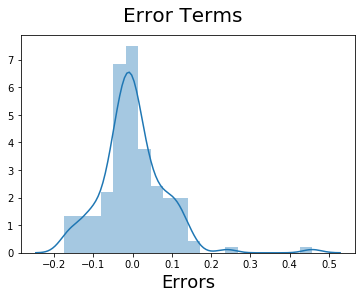

In [27]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions

In [28]:
num_vars = ['symboling', 'fueltype', 'aspiration', 'carbody', 'drivewheel','enginelocation','wheelbase','carlength',
            'carwidth','carheight','curbweight','enginetype','cylindernumber','enginesize','fuelsystem','boreratio',
            'stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [29]:
y_test = df_test.pop('price')
X_test = df_test

In [30]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [35]:
# Making predictions
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_new)

In [36]:
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.8545607157755983
0.8753609017194978
